# **Loading The Dataset**

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob as gb
import cv2
from tqdm import tqdm

In [3]:
#data path
train_dir='Skin Cancer Malignant vsBenign/train/'
test_dir='Skin Cancer Malignant vsBenign/test/'

In [4]:
for folder in  os.listdir(train_dir) : 
    print( 'folder name is : ', train_dir+folder)

folder name is :  Skin Cancer Malignant vsBenign/train/benign
folder name is :  Skin Cancer Malignant vsBenign/train/malignant


In [5]:
gb.glob(pathname= str( train_dir  + folder + '/*.jpg'))

['Skin Cancer Malignant vsBenign/train/malignant\\10.jpg',
 'Skin Cancer Malignant vsBenign/train/malignant\\100.jpg',
 'Skin Cancer Malignant vsBenign/train/malignant\\1000.jpg',
 'Skin Cancer Malignant vsBenign/train/malignant\\1001.jpg',
 'Skin Cancer Malignant vsBenign/train/malignant\\1002.jpg',
 'Skin Cancer Malignant vsBenign/train/malignant\\1004.jpg',
 'Skin Cancer Malignant vsBenign/train/malignant\\1006.jpg',
 'Skin Cancer Malignant vsBenign/train/malignant\\1008.jpg',
 'Skin Cancer Malignant vsBenign/train/malignant\\101.jpg',
 'Skin Cancer Malignant vsBenign/train/malignant\\1010.jpg',
 'Skin Cancer Malignant vsBenign/train/malignant\\1011.jpg',
 'Skin Cancer Malignant vsBenign/train/malignant\\1013.jpg',
 'Skin Cancer Malignant vsBenign/train/malignant\\1014.jpg',
 'Skin Cancer Malignant vsBenign/train/malignant\\1015.jpg',
 'Skin Cancer Malignant vsBenign/train/malignant\\1016.jpg',
 'Skin Cancer Malignant vsBenign/train/malignant\\1017.jpg',
 'Skin Cancer Malignant vsBe

In [6]:
#loading data and resize it and collect it in one folder
new_size=224    
X_train = []
y_train = []
for folder in  os.listdir(train_dir ) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( train_dir  + folder + '/*.jpg'))
    print( 'numbers of images in folder are : ', len(files))
    print(' start reading images')
    for file in tqdm(files): 
        image_class = {'benign': 0, 'malignant': 1 }
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_train.append(resized_image)
        y_train.append(image_class[folder])
    print('image reading ...finished')
print('--------------------------------------------------')        
#check items in X_test
print("items in X_train is:       ",len(X_train) , " items") 
print("items in y_train is:       ",len(y_train) , " items") 

folder name is :  benign
numbers of images in folder are :  1440
 start reading images


100%|█████████████████████████████████████████████████████████████████████████████| 1440/1440 [00:03<00:00, 408.95it/s]


image reading ...finished
folder name is :  malignant
numbers of images in folder are :  1197
 start reading images


100%|█████████████████████████████████████████████████████████████████████████████| 1197/1197 [00:02<00:00, 472.00it/s]

image reading ...finished
--------------------------------------------------
items in X_train is:        2637  items
items in y_train is:        2637  items


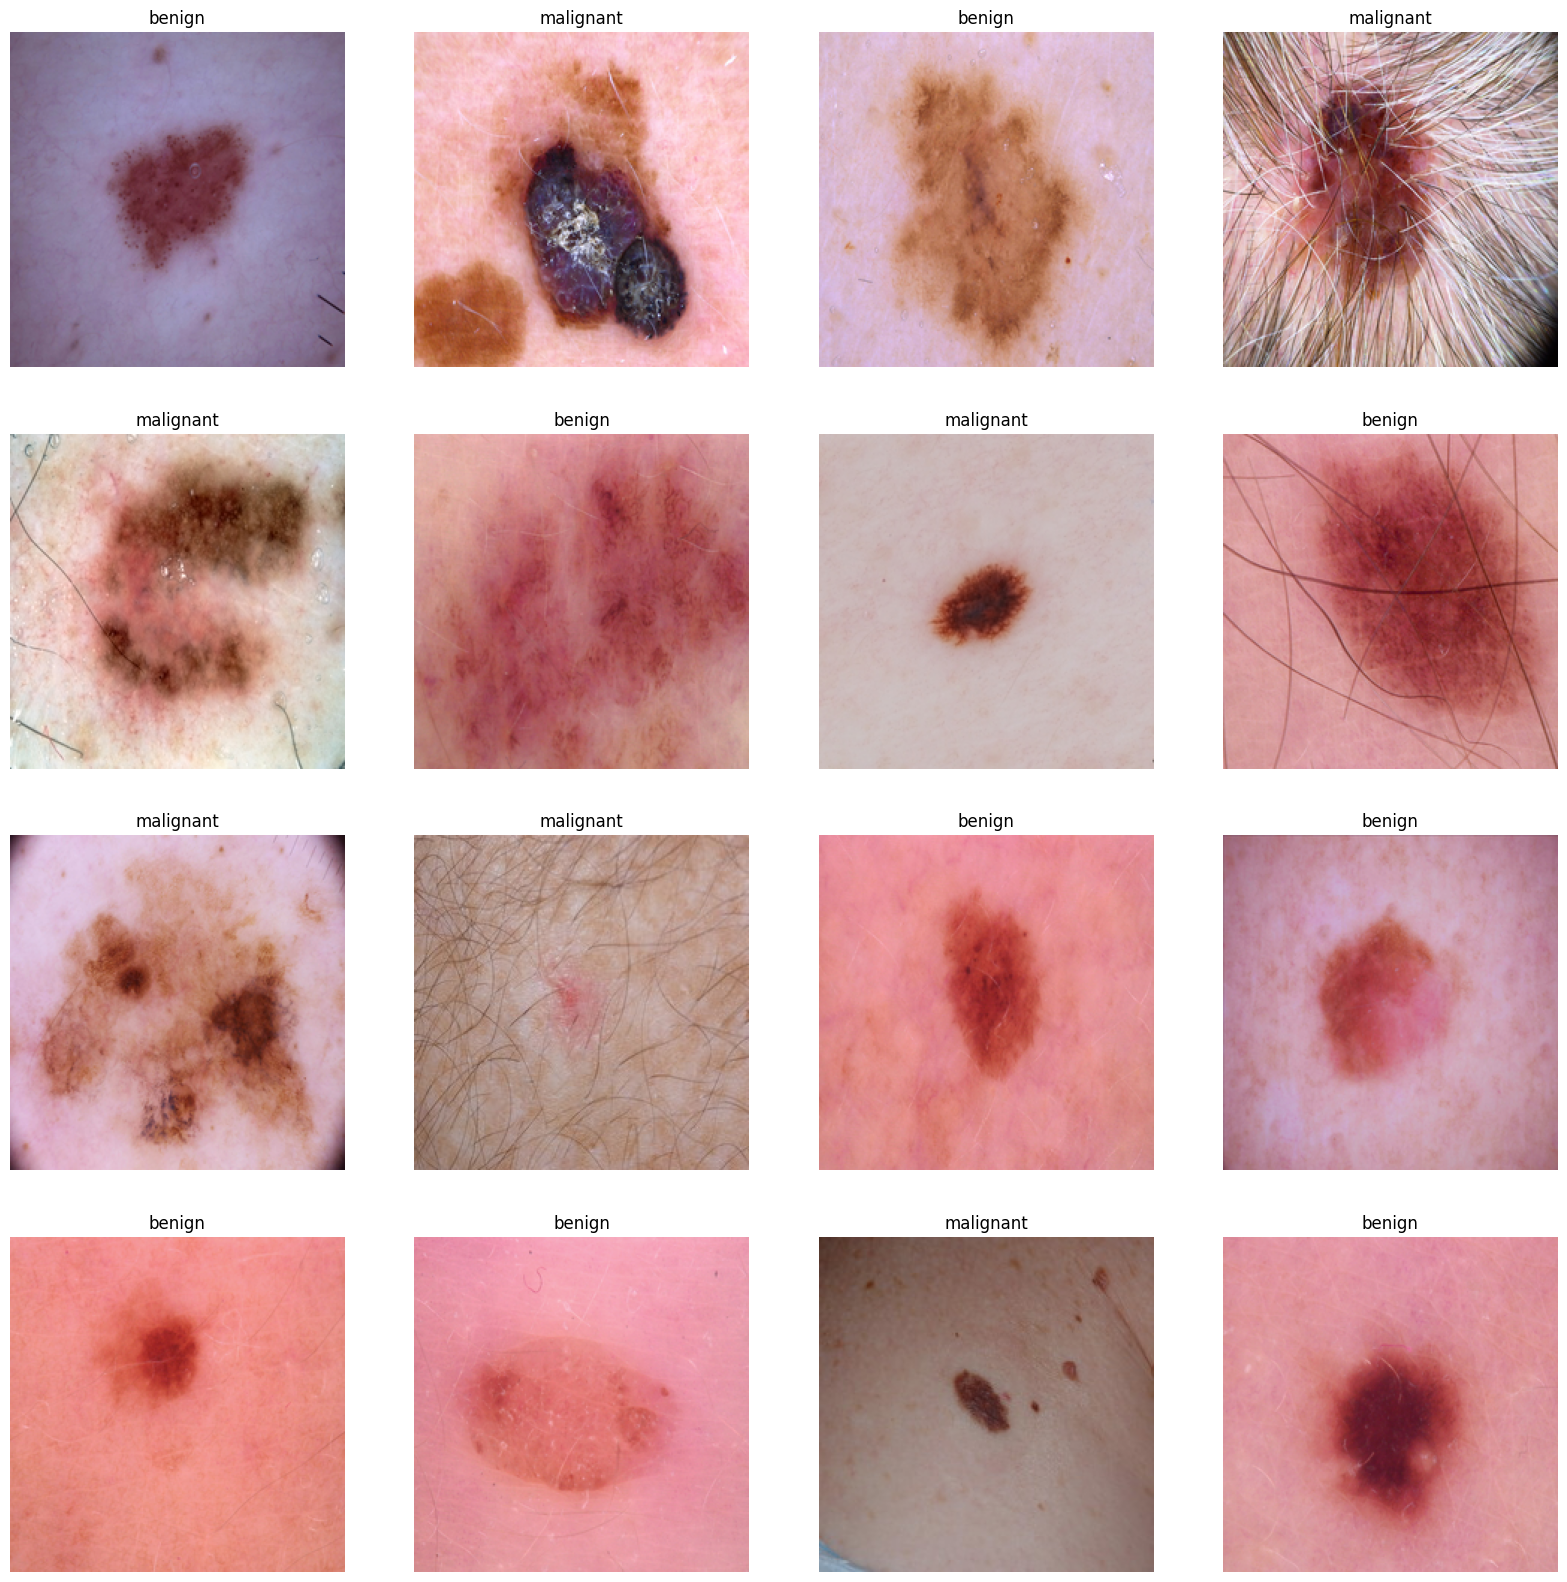

In [7]:
#showing training images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train ),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_train[i]) #,cmap='gray')   
    plt.axis('off')
    classes = {'benign': 0, 'malignant': 1 }
    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(y_train[i]))

In [8]:
#converting all TRAIN data to array
X_train = np.array(X_train)
X_train= X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)
y_train = np.array(y_train)
print("X_train shape  :" ,X_train.shape)
print("y_train shape :", y_train.shape)

X_train shape  : (2637, 224, 224, 3)
y_train shape : (2637,)


In [9]:
label_1=(y_train==1).sum()
label_1

1197

In [10]:
label_2=(y_train==0).sum()
label_2

1440

C:\Users\Nvidia\AppData\Local\Temp\ipykernel_14800\2246406196.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Set2")


<Axes: ylabel='count'>

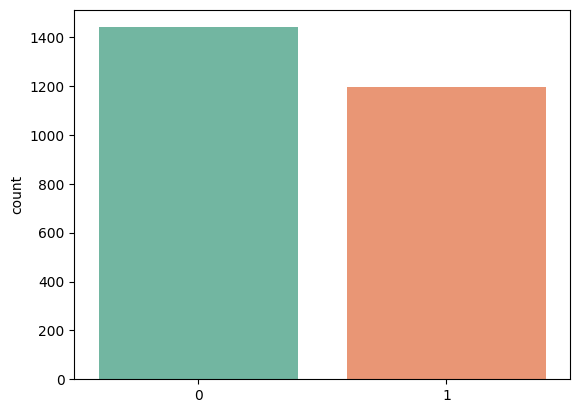

In [11]:
sns.countplot(x=y_train, palette="Set2")

In [12]:
#shuffle data
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)


ModuleNotFoundError: No module named 'sklearn'

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1,
                                                    random_state=4,stratify=y_train)

In [14]:
#normalizing data
X_train=X_train/255.0
X_test=X_test/255.0

# **Normal CNN**

In [13]:
# Creating the model using the Sequential API
from tensorflow import keras
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=64, kernel_size=7, strides=1, 
                padding="same", activation="relu", name="Conv1", input_shape= (224,224,3)))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))
model.add(keras.layers.Conv2D(filters=128, kernel_size=5, strides=1, 
                              padding="same", activation="relu", name="Conv2"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))
model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, 
                              padding="same", activation="relu", name="Conv3"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))

model.add(keras.layers.Flatten(name="Flatten1"))
model.add(keras.layers.Dense(128, activation="relu", name="Dense1"))
model.add(keras.layers.Dense(64, activation="relu", name="Dense2"))
model.add(keras.layers.Dense(1, activation="sigmoid", name="Output"))

# The model’s summary() method displays all the model’s layers
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 224, 224, 64)      9472      
                                                                 
 Pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 Conv2 (Conv2D)              (None, 112, 112, 128)     204928    
                                                                 
 Pool2 (MaxPooling2D)        (None, 56, 56, 128)       0         
                                                                 
 Conv3 (Conv2D)              (None, 56, 56, 256)       295168    
                                                                 
 Pool3 (MaxPooling2D)        (None, 28, 28, 256)       0         
                                                                 
 Flatten1 (Flatten)          (None, 200704)            0

In [14]:
# Plot the model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [15]:
!pip install sklearn

'2.10.1'

In [16]:
# Compiling the model
model.compile(loss="binary_crossentropy", optimizer= 'adam', metrics=["accuracy"])

# Training the model 
history = model.fit(X_train, y_train, epochs=10, batch_size=16)
# history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.2)


Epoch 1/10
165/165 [==============================] - 20s 78ms/step - loss: 9.8934 - accuracy: 0.5404
Epoch 2/10
165/165 [==============================] - 11s 69ms/step - loss: 0.6583 - accuracy: 0.6162
Epoch 3/10
151/165 [==========================>...] - ETA: 0s - loss: 0.5944 - accuracy: 0.6883

KeyboardInterrupt: 

In [39]:
history.history

{'loss': [0.6985907554626465,
  0.5571446418762207,
  0.5219504833221436,
  0.6221209764480591,
  0.5320682525634766,
  0.5528193712234497,
  0.4642399847507477,
  0.4594949781894684,
  0.45405450463294983,
  0.4028379023075104],
 'accuracy': [0.6080909967422485,
  0.7088074088096619,
  0.7425200343132019,
  0.6586599349975586,
  0.7357774972915649,
  0.7319848537445068,
  0.7732827663421631,
  0.7762326002120972,
  0.7812895178794861,
  0.8027812838554382],
 'val_loss': [0.6679431796073914,
  0.5661551356315613,
  0.6694452166557312,
  0.5011888146400452,
  0.4715600609779358,
  0.5092674493789673,
  0.45984211564064026,
  0.6647772789001465,
  0.4142735004425049,
  0.3935253918170929],
 'val_accuracy': [0.5795454382896423,
  0.7045454382896423,
  0.5719696879386902,
  0.7424242496490479,
  0.7651515007019043,
  0.7689393758773804,
  0.7727272510528564,
  0.7424242496490479,
  0.8181818127632141,
  0.7878788113594055]}

In [40]:
#plotting training values
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

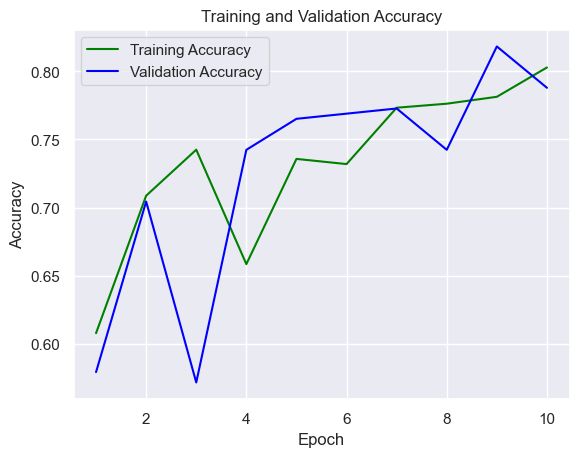

In [41]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

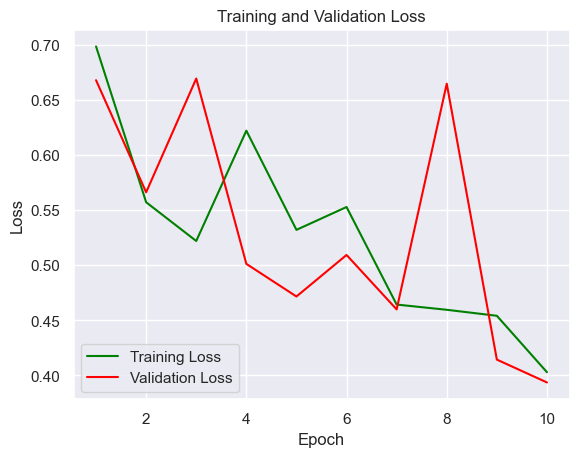

In [42]:
plt.figure()
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [43]:
# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])

9/9 [==============================] - 6s 707ms/step - loss: 0.3935 - accuracy: 0.7879
Loss     :  0.3935254216194153
accuracy :  0.7878788113594055


9/9 [==============================] - 7s 712ms/step
Classification report : 
               precision    recall  f1-score   support

      benign       0.92      0.67      0.77       144
   malignant       0.70      0.93      0.80       120

    accuracy                           0.79       264
   macro avg       0.81      0.80      0.79       264
weighted avg       0.82      0.79      0.79       264

Confusion matrix : 



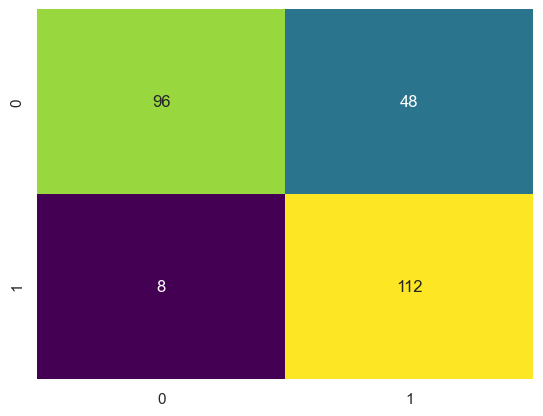

Normalized confusion matrix : 



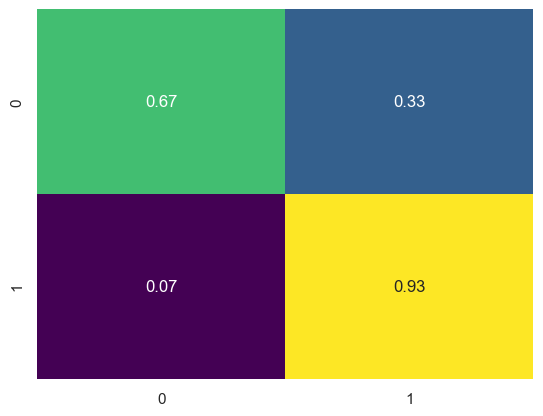

In [44]:
# Confusion Matrix
y_pred = np.round(model.predict(X_test))
#y_pred = (model.predict(X_test) > 0.5).astype("int32").tolist()

class_names = ["benign", "malignant"]

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
    # Compute confusion matrix
    conf_matx = confusion_matrix(true, preds, normalize = normalize)
    conf_matx = np.round(conf_matx, 2)
    # print(conf_matx)

    # plt.subplots(figsize=(14,8))
    sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
    plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred, "true")



In [45]:
# Make predictions
# predicted = model.predict(X_new)

# Loading the model:
# model = keras.models.load_model("/content/my_model.h5")

# Save the model
model.save("Cancer0.h5")


C:\Users\Nvidia\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
model = keras.models.load_model("Cancer.h5")

TypeError: weight_decay is not a valid argument, kwargs should be empty  for `optimizer_experimental.Optimizer`.

# **Inference**

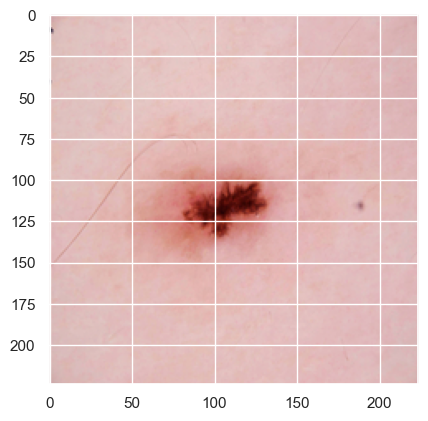

(1, 224, 224, 3)
1/1 [==============================] - 0s 51ms/step
[1.]


In [52]:
img = cv2.imread("1.jpg")
H,W,C = 224,224,3
img = cv2.resize(img, (H, W)) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
img = np.array(img)
img = img.astype("float32")  
img = img / 255.0

plt.imshow(img)
plt.show()

img = img.reshape(1,H,W,C)
print(img.shape)

prediction = np.round(model.predict(img).flatten())
# prediction = (model.predict(img) > 0.5).astype("int32").flatten()
print(prediction)


In [58]:
prediction[0]

1.0

In [ ]:
#!pip install gradio

In [21]:
# https://gradio.app/docs/

import tensorflow as tf
from tensorflow import keras
import numpy as np
import gradio as gr
import requests
import cv2

model=tf.keras.models.load_model('Cancer.h5')

def inference(img):
    labels =["benign","malignant"]
    H,W,C = 224,224,3
    img = cv2.resize(img, (H, W)) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img.astype("float32")/255.0
    img = img.reshape(1,H,W,C)
    pred = model.predict(img).flatten()
    print(pred)
    prediction = [1- pred,pred]
    dictionary = dict(zip(labels, map(float, prediction)))
    return dictionary

nbr_top_classes = 2
gr.Interface(fn=inference, 
             inputs=gr.Image(), 
             outputs=gr.Label(num_top_classes=nbr_top_classes),
             theme="dark"
             ).launch(share=True) #, debug=True Use in Colab


ImportError: cannot import name 'isfilelike' from 'fsspec.utils' (C:\Users\Nvidia\anaconda3\lib\site-packages\fsspec\utils.py)